# DATAFEST DATATHON SUBMISSION

# Team Name: NSK.ai

In [2]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [3]:
#Load train dataset
train=pd.read_csv(r"C:\Users\DELL\Downloads\train_datafest.csv")

In [4]:
# displaying all columns
pd.set_option('display.max_columns', None)

In [5]:
#Statistical Description of the Dataset
train.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.251600e+04,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000
mean,5.599485e+06,43.026766,0.425056,3654.110658,1.191355,3.532998,3.593161,3.402205,3.508469,0.795462,950.251518,61133.401246,0.690665,0.877954,0.582848,0.718456,0.621944,0.621912,6.494088,0.540588
std,2.563354e+06,11.865891,0.494371,1508.072163,2.404529,2.265293,2.749211,2.206649,1.959969,0.403380,706.915146,15396.809340,0.090294,0.054197,0.125260,0.121103,0.139876,0.139623,3.731870,0.498370
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.376885e+06,34.000000,0.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49450.000000,0.641221,0.850893,0.499887,0.635005,0.519794,0.519662,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3255.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699621,0.880993,0.588202,0.725717,0.624081,0.623781,6.000000,1.000000
75%,7.803325e+06,51.000000,1.000000,4661.250000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752053,0.911485,0.672431,0.806576,0.729609,0.728389,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,14.000000,1.000000,10200.000000,99750.000000,0.999997,0.999012,0.978932,0.993363,0.970249,0.966953,30.000000,1.000000


In [6]:
train.shape

(12516, 21)

In [7]:
train.duplicated().sum()

0


# Data Cleaning

In [8]:
#Checking for null values
print(" Number of Null Values:", train.isna().sum().sum())

 Number of Null Values: 0


In [9]:
print(" Number of Duplicated Rows:", train.duplicated().sum())

 Number of Duplicated Rows: 0


In [10]:
train.columns

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [11]:
# consistency check for the object column
for x in train.columns:
    if train[x].dtype == 'object':
        print(train[x].unique())

['bi-weekly' 'semi-monthly' 'weekly' 'monthly']


From the above it can be seen that our data is clean since it contains no null values nor repeated rows or columns

In [12]:
#Checking datatypes of columns
train.dtypes

Entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

The columns 'home_owner' and 'has_debt' are categorical columns hence should be represented as such

In [15]:
train['home_owner'] = train.home_owner.astype('category')
train['has_debt'] = train.has_debt.astype('category')

In [13]:
#Checking for imbalance in the dataset
train['e_signed'].value_counts()

1    6766
0    5750
Name: e_signed, dtype: int64

It can be seen above that the dataset is fairly balanced

# Exploratory Data Analysis

In [14]:
cols = list(train.columns)
cols.remove('e_signed')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\l

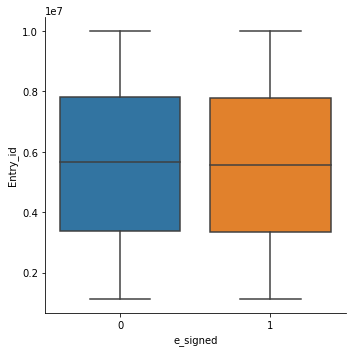

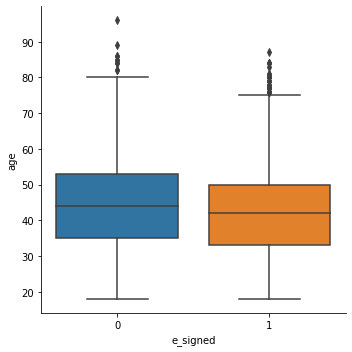

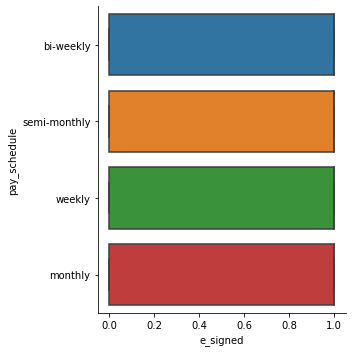

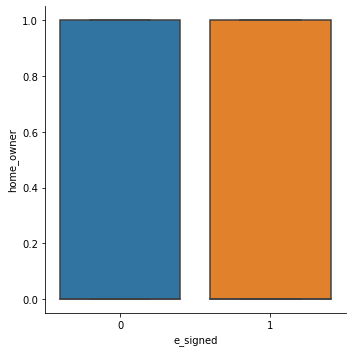

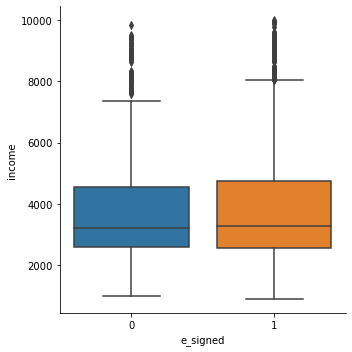

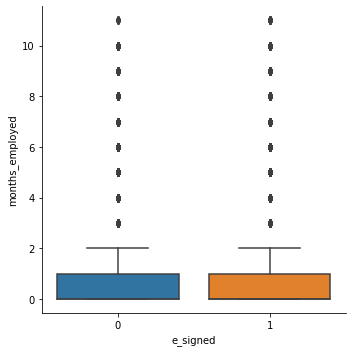

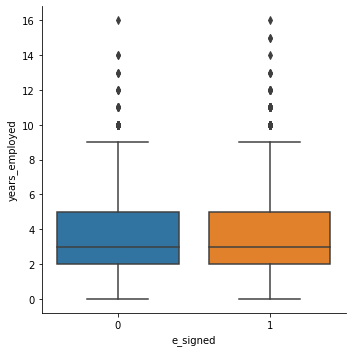

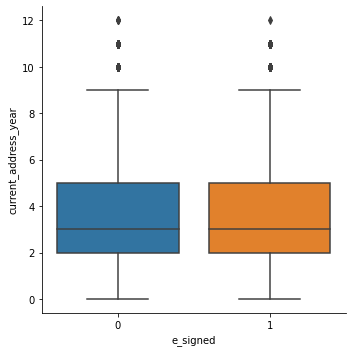

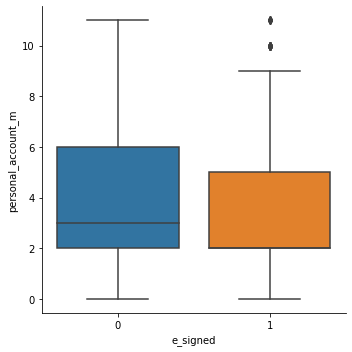

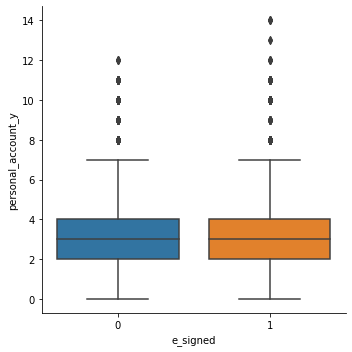

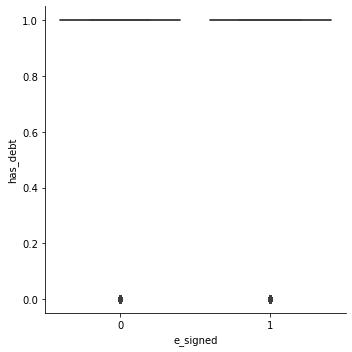

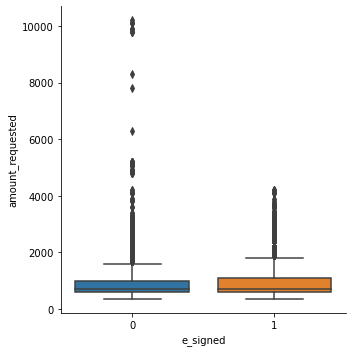

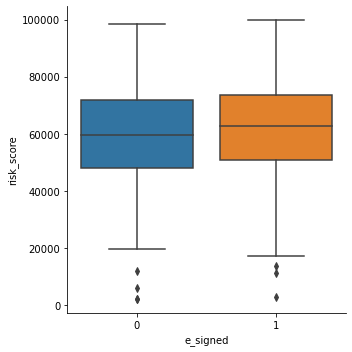

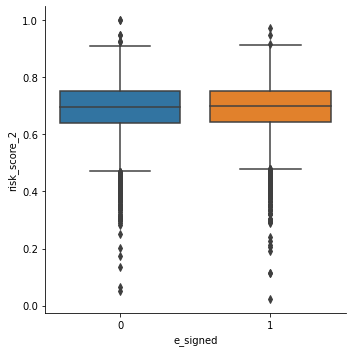

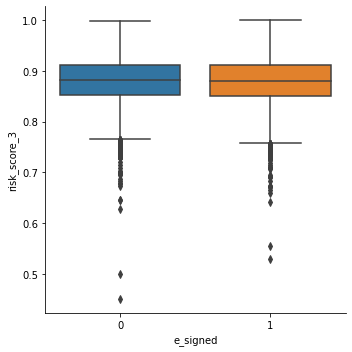

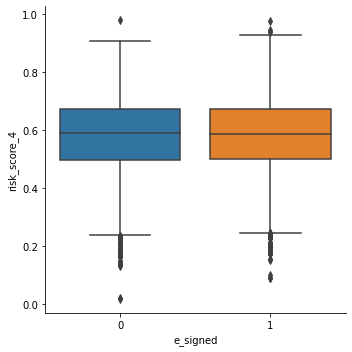

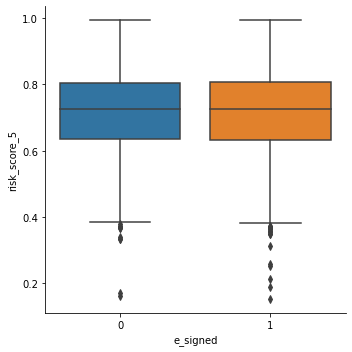

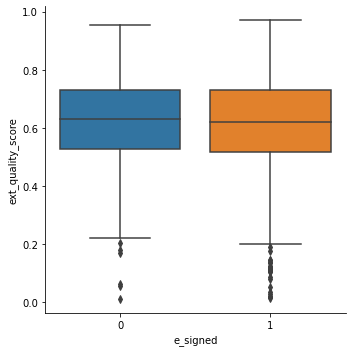

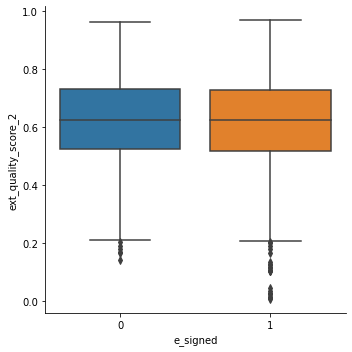

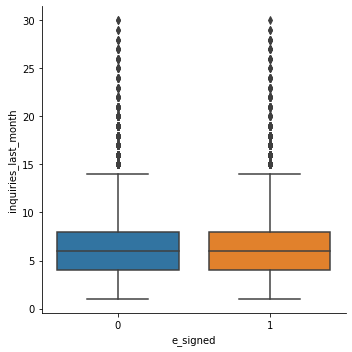

In [15]:
# getting a box plot for each feature with the target on the x axis
for x in cols:
    sns.catplot('e_signed', x, kind = 'box', data = train)

Observations
1. We have lesser age distribution for those who were lent money.
2. The months employed and year employed could be made one
2. The income category distribution is higher for those who were lent but we have different schedule for the salaries, so we have to take that into account.
3. Personal account_m seems to be lower for those who were lent but that with the year column seem to be the same, maybe I could convert it to months only.
4. The distribution for amount_requested seems to be higher for those who were lent.
5. The risk score is higher for those who were lent. and it's value goes from 0 - 100000 so we can make it from 0-1 as the rest.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


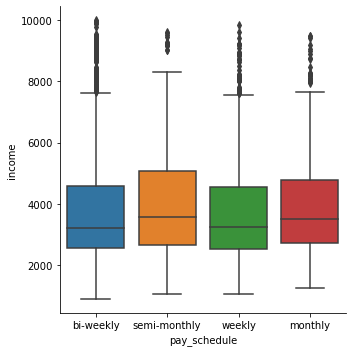

In [16]:
#A box plot of pay schedule with income
sns.catplot('pay_schedule', 'income', data = train, kind = 'box')

In [17]:
train_groups=train.groupby('pay_schedule')['e_signed']

In [18]:
train_groups.head()

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
12    1
14    1
17    0
18    1
22    1
24    0
28    0
37    0
41    1
46    1
52    0
68    1
Name: e_signed, dtype: int64

In [20]:
train.head(10)

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,1,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,1,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,1,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1
5,8908605,51,bi-weekly,1,3055,0,6,11,4,2,1,600,59750,0.624666,0.968565,0.509919,0.749624,0.758607,0.758607,5,1
6,3818616,34,weekly,0,3877,6,5,2,2,7,1,800,55550,0.802788,0.900083,0.746077,0.791319,0.807174,0.507174,10,1
7,6889184,56,bi-weekly,0,3555,0,8,8,6,2,1,900,64500,0.640915,0.869770,0.699680,0.706527,0.752686,0.452686,10,1
8,6817588,24,bi-weekly,0,2135,5,1,3,3,2,1,1000,63000,0.549034,0.739686,0.484734,0.558979,0.454199,0.454199,8,1
9,6235249,50,bi-weekly,0,3700,0,2,6,2,1,1,500,2800,0.467041,0.809313,0.624904,0.621841,0.462823,0.462823,16,1


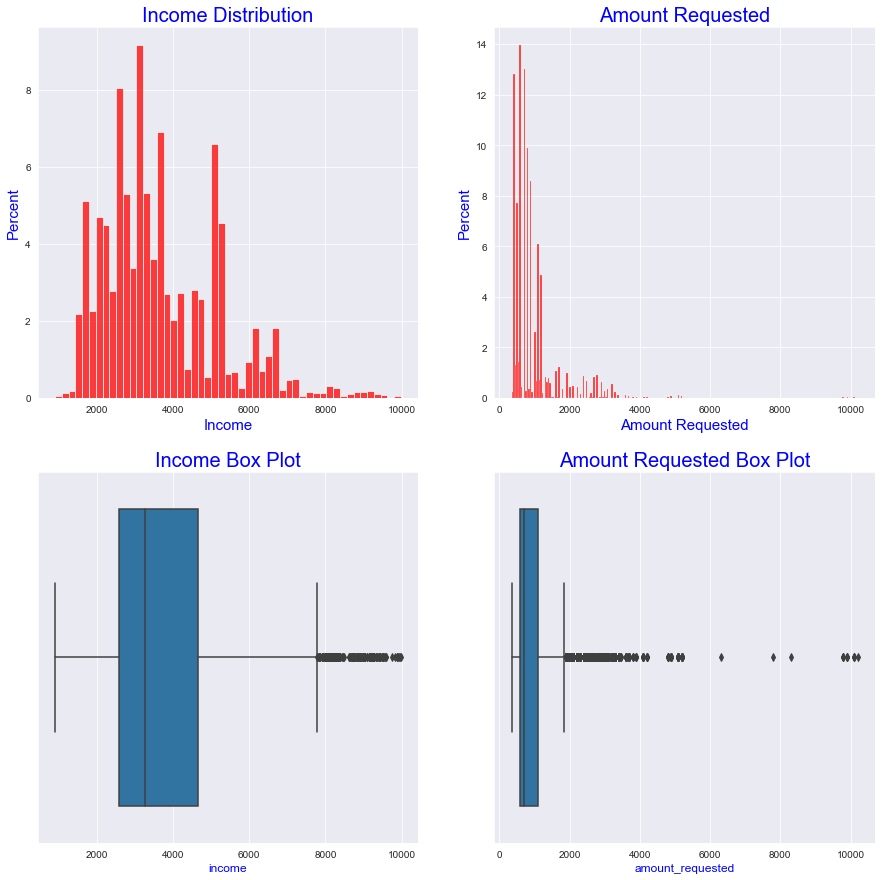

In [54]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.set_style("darkgrid")

# Income Distribution
ax[0,0].set_title('Income Distribution',size=20,color="b")
ax[0,0].set_xlabel('Income',size=15,color='b');ax[0,0].set_ylabel("Percent",size=15,color="b")
sns.histplot(train.income,ax=ax[0,0],color="r",stat="percent")

ax[1,0].set_title('Income Box Plot',size=20,color="b")
ax[1,0].set_xlabel('Income',size=12,color="b");
sns.boxplot(x=train.income,ax=ax[1,0])

# Amount Requested
ax[0,1].set_title('Amount Requested',size=20,color="b")
ax[0,1].set_xlabel('Amount Requested',size=15,color="b");ax[0,1].set_ylabel("Percent",size=15,color="b")
sns.histplot(train.amount_requested,ax=ax[0,1],color="r",stat="percent")

ax[1,1].set_title('Amount Requested Box Plot',size=20,color="b")
ax[1,1].set_xlabel('Amount Requested',size=12,color="b");
sns.boxplot(x=train.amount_requested,ax=ax[1,1])

plt.show()

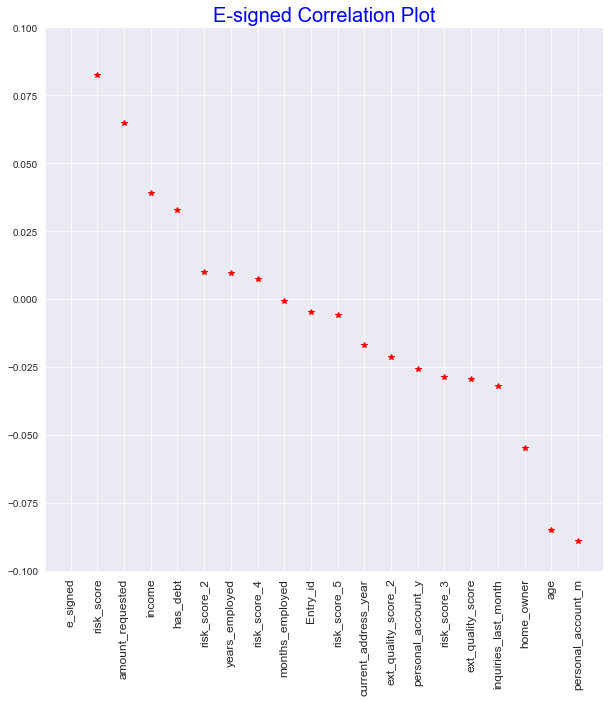

In [52]:
ecorr=train.corr().e_signed.sort_values(ascending=False)
# E Signed Correlation Plot
plt.figure(figsize=(10,10))
plt.title("E-signed Correlation Plot",size=20,color="b")
sns.set_style("darkgrid")
plt.plot(ecorr,"r*")
plt.ylim([-0.1,0.1])
plt.xticks(rotation=90,size=12);
plt.show()

The plot Above shows the Pearson Corrletation between E-signed and other features in descending order

We will Visualize some feaures that correlate more with the Target e_signed for probable insights

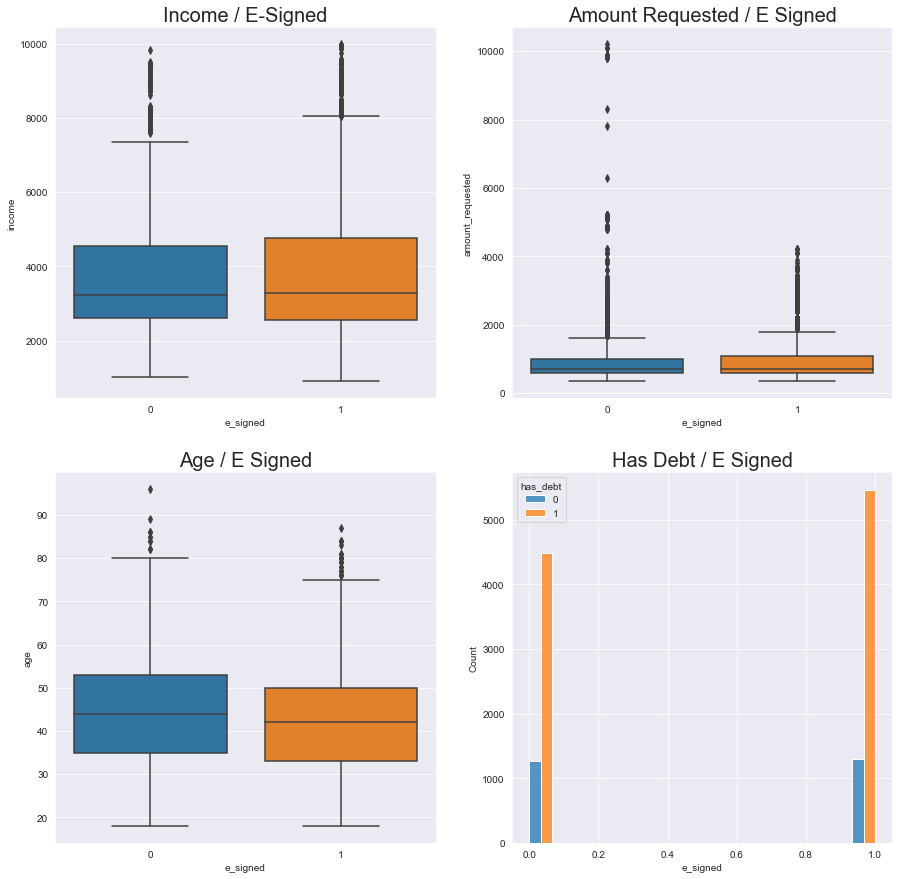

In [53]:
# Understanding the Number of People
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.set_style("darkgrid")

# income e-signed
ax[0,0].set_title('Income / E-Signed',size=20)
sns.boxplot(x=train.e_signed,y=train.income,ax=ax[0,0])

# Amount Requested E-Signed
ax[0,1].set_title('Amount Requested / E Signed',size=20)
sns.boxplot(x=train.e_signed,y=train.amount_requested,ax=ax[0,1])

# Age E-Signed
ax[1,0].set_title('Age / E Signed',size=20)
sns.boxplot(x=train.e_signed,y=train.age,ax=ax[1,0])

# Has Debt E Signed
ax[1,1].set_title('Has Debt / E Signed',size=20)
sns.histplot(x=train.e_signed,hue=train.has_debt,ax=ax[1,1],multiple="dodge")

plt.show()

The Cell Above shows the Variation of select Features with the target label E-signed. `Income / E-Signed ` Shows that both debts request accepted (1) and those rejected (1) has same Income distribution. same with other features. 